In [1]:
#라이브러리 불러오기
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

#한글 깨짐 처리
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

#gensim
import gensim
import gensim.corpora as corpora
from gensim.models import LdaSeqModel
import pyLDAvis.gensim_models

In [2]:
# 모델 불러오기
model=LdaSeqModel.load("DTM_8.model")

# 주제별 키워드 파악 (총 8개 주제)

## Topic0

In [3]:
#연도별 상위 키워드
keywords_0=model.print_topic_times(0,10)
keywords_0

[[('제조', 0.04176383002555557),
  ('함유', 0.013540705180810433),
  ('화합물', 0.013350685683290307),
  ('우수', 0.011929115361473706),
  ('반응', 0.010975739541246967),
  ('효과', 0.010885779107118687),
  ('물질', 0.010833225451922278),
  ('혼합', 0.010461381825645603),
  ('중량', 0.008954154945077472),
  ('수지', 0.008383294886587794)],
 [('제조', 0.042245663774305275),
  ('함유', 0.013554185280530763),
  ('화합물', 0.013541803945358583),
  ('우수', 0.011734188765711244),
  ('효과', 0.011142280231274724),
  ('반응', 0.010973840107596446),
  ('물질', 0.010489720042004448),
  ('혼합', 0.010475850789444099),
  ('중량', 0.008801151822939937),
  ('수지', 0.008649295699739382)],
 [('제조', 0.04297625313453418),
  ('화합물', 0.013659709344267025),
  ('함유', 0.013390396067931408),
  ('우수', 0.011585317562103152),
  ('효과', 0.011507401168322787),
  ('반응', 0.010964334280604372),
  ('혼합', 0.010487949577349852),
  ('물질', 0.009696076037641076),
  ('수지', 0.008898452939465028),
  ('중량', 0.008770385882699966)],
 [('제조', 0.04339993165444184),
  ('화

In [4]:
#상위 키워드 연도별 값 추출 함수
def get_keyword(keyword_list,keywords):
    total=[]
    for year in keyword_list:
        values=[]
        for keyword in year:
            for word in keywords:
                if keyword[0]==word:
                    values.append(keyword[1])
        total.append(values)
    df=pd.DataFrame(total,columns=keywords)
    df.insert(loc=0,column='year',value=[2015,2016,2017,2018,2019,2020,2021,2022])
    return df

In [5]:
#상위 6개 키워드 설정
words_0=['제조','함유','화합물','우수','반응','효과']

In [6]:
df_0 = get_keyword(keywords_0,words_0)
df_0

,year,제조,함유,화합물,우수,반응,효과
0,2015,0.041764,0.013541,0.013351,0.011929,0.010976,0.010886
1,2016,0.042246,0.013554,0.013542,0.011734,0.011142,0.010974
2,2017,0.042976,0.013660,0.013390,0.011585,0.011507,0.010964
3,2018,0.043400,0.013351,0.013188,0.011803,0.011428,0.010918
4,2019,0.043236,0.013148,0.012832,0.011859,0.011341,0.010814
5,2020,0.042521,0.013138,0.011901,0.011602,0.011231,0.010683
6,2021,0.041646,0.013550,0.012151,0.011058,0.011057,0.010545
7,2022,0.040877,0.014321,0.012902,0.010913,0.010563,0.010419


In [15]:
#파일 저장
df_0.to_excel('Topic0.xlsx')

In [8]:
#시각화 함수
def keywords_graph(df,keywords):
    color_list=['C0','C1','C2','C3','C4','C5']
    plt.figure(figsize=(10,5))
    for i in range(len(keywords)):
        sns.lineplot(data=df,x='year',y=keywords[i],color=color_list[i])
    plt.xticks(fontsize=12 )
    plt.yticks(fontsize=12 )
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Probability', fontsize=16)
    plt.legend(keywords,loc='center left', bbox_to_anchor=(1, 0.7),fontsize=14)
    plt.show()

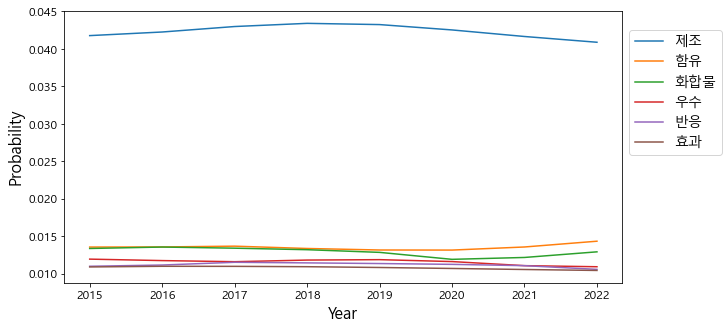

In [9]:
keywords_graph(df_0,words_0)

## Topic 1

In [10]:
#연도별 상위 키워드
keywords_1=model.print_topic_times(1,10)
keywords_1

[[('측정', 0.027213059844549938),
  ('영상', 0.026567593412174496),
  ('신호', 0.025844200089571622),
  ('센서', 0.024022067623364205),
  ('장치', 0.021440367892532876),
  ('검출', 0.017885968665952427),
  ('감지', 0.016207680508812602),
  ('정보', 0.015379001414273707),
  ('데이터', 0.015191559404836377),
  ('위치', 0.01393348533248523)],
 [('측정', 0.0273521419387689),
  ('영상', 0.0268068573326389),
  ('신호', 0.02540006927089523),
  ('센서', 0.024335747850760956),
  ('장치', 0.021411423954082687),
  ('검출', 0.017748778973274135),
  ('감지', 0.01610279858792968),
  ('정보', 0.015605052763102874),
  ('데이터', 0.015533553787579348),
  ('이미지', 0.013944451014137266)],
 [('측정', 0.02773798662592732),
  ('영상', 0.02690179338372961),
  ('센서', 0.025112664339777237),
  ('신호', 0.024582122732377906),
  ('장치', 0.0213243413340065),
  ('검출', 0.01745519019574234),
  ('데이터', 0.016202407053769876),
  ('정보', 0.01602670691423916),
  ('감지', 0.01563680059355809),
  ('이미지', 0.014501611093940714)],
 [('측정', 0.027986629027588847),
  ('영상', 0.026

In [11]:
#상위 6개 키워드 설정
words_1=['측정','영상','신호','센서','장치','검출']

In [12]:
df_1 = get_keyword(keywords_1,words_1)
df_1

,year,측정,영상,신호,센서,장치,검출
0,2015,0.027213,0.026568,0.025844,0.024022,0.021440,0.017886
1,2016,0.027352,0.026807,0.025400,0.024336,0.021411,0.017749
2,2017,0.027738,0.026902,0.025113,0.024582,0.021324,0.017455
3,2018,0.027987,0.026583,0.025632,0.023473,0.021234,0.017037
4,2019,0.027435,0.025842,0.025764,0.022153,0.021159,0.016555
5,2020,0.026129,0.025016,0.024984,0.021140,0.020426,0.016099
6,2021,0.024896,0.024070,0.024006,0.021120,0.018297,0.015739
7,2022,0.024120,0.023932,0.023454,0.021108,0.016800,0.015535


In [16]:
#파일 저장
df_1.to_excel('Topic1.xlsx')

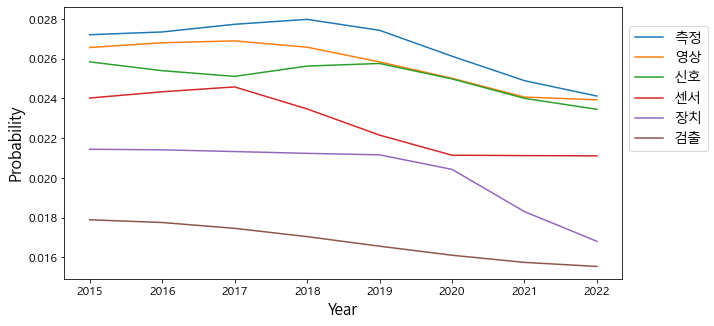

In [13]:
keywords_graph(df_1,words_1)

## Topic 2

In [17]:
#연도별 상위 키워드
keywords_2=model.print_topic_times(2,10)
keywords_2

[[('회전', 0.050326115172357876),
  ('장치', 0.03852006560742097),
  ('이동', 0.03026426937845051),
  ('차량', 0.02902371176996966),
  ('유닛', 0.025847522521964157),
  ('구동', 0.02050677758269859),
  ('방향', 0.017932685090150394),
  ('위치', 0.01694195903136288),
  ('수단', 0.014513838041477845),
  ('제어', 0.01426362214466149)],
 [('회전', 0.050175669593745725),
  ('장치', 0.037615934335976105),
  ('이동', 0.031165359824848922),
  ('차량', 0.029177005813809317),
  ('유닛', 0.026377760571702536),
  ('구동', 0.020559945546753947),
  ('방향', 0.01831191689031193),
  ('위치', 0.017092806682978422),
  ('모터', 0.014641367624203351),
  ('제어', 0.014489373473274133)],
 [('회전', 0.049858761750984734),
  ('장치', 0.03658095621993032),
  ('이동', 0.03165106425418276),
  ('차량', 0.028845339816482733),
  ('유닛', 0.0273930811257391),
  ('구동', 0.02055876095530283),
  ('방향', 0.01877375658822682),
  ('위치', 0.017385541577000868),
  ('제어', 0.014780941875667938),
  ('모터', 0.014766323797711065)],
 [('회전', 0.04954137474357715),
  ('장치', 0.03605163

In [18]:
#상위 6개 키워드 설정
words_2=['회전','장치','이동','차량','유닛','구동']

In [19]:
df_2 = get_keyword(keywords_2,words_2)
df_2

,year,회전,장치,이동,차량,유닛,구동
0,2015,0.050326,0.038520,0.030264,0.029024,0.025848,0.020507
1,2016,0.050176,0.037616,0.031165,0.029177,0.026378,0.020560
2,2017,0.049859,0.036581,0.031651,0.028845,0.027393,0.020559
3,2018,0.049541,0.036052,0.031823,0.028785,0.027668,0.020502
4,2019,0.049172,0.036009,0.031896,0.030401,0.027549,0.020250
5,2020,0.048655,0.035951,0.032944,0.031685,0.028625,0.019857
6,2021,0.047925,0.035590,0.033299,0.032116,0.031154,0.019411
7,2022,0.047315,0.035210,0.033112,0.032240,0.031843,0.019012


In [21]:
#파일 저장
df_2.to_excel('Topic2.xlsx')

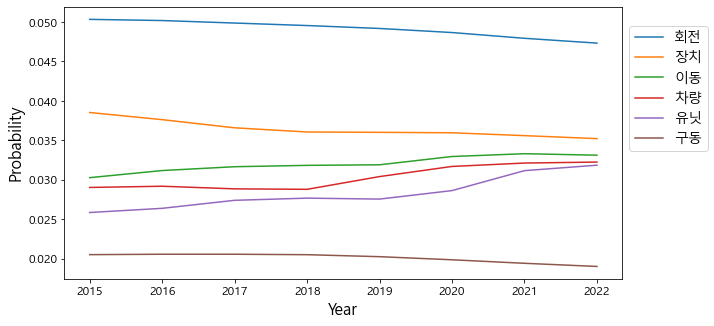

In [20]:
keywords_graph(df_2,words_2)

## Topic 3

In [22]:
keywords_3=model.print_topic_times(3,10)
keywords_3

[[('형성', 0.04602781562043838),
  ('결합', 0.031237669067648903),
  ('고정', 0.02724656255817112),
  ('연결', 0.01958431001443721),
  ('상부', 0.018999250769086467),
  ('지지', 0.017307147193875484),
  ('프레임', 0.016785981654190648),
  ('하부', 0.016342163694100277),
  ('삽입', 0.014462741664481985),
  ('본체', 0.013344759627991282)],
 [('형성', 0.045882452823229274),
  ('결합', 0.03132761974882476),
  ('고정', 0.027161024877616246),
  ('연결', 0.01974634296091748),
  ('상부', 0.01896492784532106),
  ('지지', 0.017269373823566383),
  ('프레임', 0.017195268306363223),
  ('하부', 0.016215805389731136),
  ('삽입', 0.014466878161449565),
  ('본체', 0.013463782352791612)],
 [('형성', 0.045513869168445145),
  ('결합', 0.031420283788891654),
  ('고정', 0.02684776092052694),
  ('연결', 0.020020530983668718),
  ('상부', 0.01907303838092606),
  ('프레임', 0.017998326985996533),
  ('지지', 0.017358645751065223),
  ('하부', 0.01596921899441176),
  ('삽입', 0.01445610342860528),
  ('본체', 0.013694689314053569)],
 [('형성', 0.04502898294324595),
  ('결합', 0.03

In [23]:
#상위 6개 키워드 설정
words_3=['형성','결합','고정','연결','상부','지지']

In [24]:
df_3 = get_keyword(keywords_3,words_3)
df_3

,year,형성,결합,고정,연결,상부,지지
0,2015,0.046028,0.031238,0.027247,0.019584,0.018999,0.017307
1,2016,0.045882,0.031328,0.027161,0.019746,0.018965,0.017269
2,2017,0.045514,0.031420,0.026848,0.020021,0.019073,0.017359
3,2018,0.045029,0.031248,0.026389,0.020413,0.018922,0.017814
4,2019,0.044440,0.031009,0.025948,0.020831,0.018757,0.018122
5,2020,0.043779,0.030675,0.025432,0.021168,0.018801,0.017908
6,2021,0.043190,0.030299,0.024892,0.021362,0.019046,0.017805
7,2022,0.042851,0.030037,0.024466,0.021460,0.018867,0.017910


In [26]:
#파일 저장
df_3.to_excel('Topic3.xlsx')

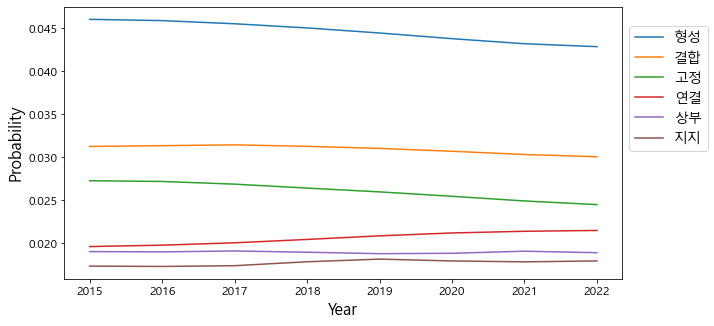

In [25]:
keywords_graph(df_3,words_3)

## Topic 4

In [27]:
keywords_4=model.print_topic_times(4,10)
keywords_4

[[('형성', 0.04779111243177416),
  ('기판', 0.04004718791029864),
  ('영역', 0.024187468246710045),
  ('표면', 0.0202602140635158),
  ('제조', 0.018297969310223303),
  ('필름', 0.016865048483094485),
  ('반도체', 0.014382823275950219),
  ('패턴', 0.014017612632897714),
  ('금속', 0.013498087503845763),
  ('시트', 0.013359416658186393)],
 [('형성', 0.04818904176934203),
  ('기판', 0.039349755083849136),
  ('영역', 0.024544485735061995),
  ('표면', 0.019971358453927866),
  ('제조', 0.01819255593707801),
  ('필름', 0.01703587567144459),
  ('패턴', 0.014426990582131163),
  ('반도체', 0.014394510317718498),
  ('금속', 0.013769802867594718),
  ('시트', 0.013432818668068143)],
 [('형성', 0.04865407824342213),
  ('기판', 0.03890027164766659),
  ('영역', 0.025307614050914223),
  ('표면', 0.019651779323638444),
  ('제조', 0.017737354763442327),
  ('필름', 0.017185032915196678),
  ('패턴', 0.0144279621772369),
  ('반도체', 0.014164587720340955),
  ('금속', 0.013766984564062923),
  ('시트', 0.013508724343784343)],
 [('형성', 0.04867803469969298),
  ('기판', 0.039

In [28]:
#상위 6개 키워드 설정
words_4=['형성','기판','영역','표면','제조','필름']

In [29]:
df_4 = get_keyword(keywords_4,words_4)
df_4

,year,형성,기판,영역,표면,제조,필름
0,2015,0.047791,0.040047,0.024187,0.020260,0.018298,0.016865
1,2016,0.048189,0.039350,0.024544,0.019971,0.018193,0.017036
2,2017,0.048654,0.038900,0.025308,0.019652,0.017737,0.017185
3,2018,0.048678,0.039401,0.026506,0.019359,0.017050,0.016948
4,2019,0.047564,0.040513,0.028049,0.019362,0.016696,0.016203
5,2020,0.044780,0.041867,0.029749,0.019536,0.016366,0.014982
6,2021,0.043137,0.040641,0.031339,0.019870,0.016146,0.013663
7,2022,0.043915,0.037444,0.032309,0.020146,0.015923,0.012618


In [31]:
#파일 저장
df_4.to_excel('Topic4.xlsx')

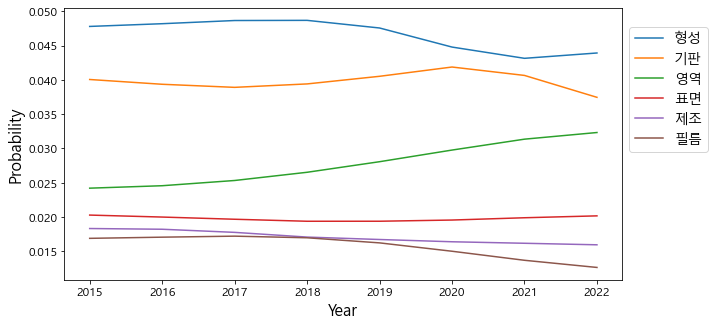

In [32]:
keywords_graph(df_4,words_4)

## Topic 5

In [33]:
keywords_5=model.print_topic_times(5,10)
keywords_5

[[('전극', 0.0394494022001578),
  ('신호', 0.02874543080963208),
  ('제어', 0.02631765336764404),
  ('전기', 0.025666364819216355),
  ('전압', 0.02477602111503133),
  ('연결', 0.0239536994470286),
  ('장치', 0.023482149405508353),
  ('출력', 0.023179183610358766),
  ('전력', 0.02027284145018623),
  ('전원', 0.020186820345729464)],
 [('전극', 0.04003431310642611),
  ('신호', 0.028985567475502513),
  ('제어', 0.026423493888762046),
  ('전기', 0.024943453407152722),
  ('전압', 0.024556955544334062),
  ('연결', 0.02420166996001793),
  ('장치', 0.023077919308521058),
  ('출력', 0.02288638513679032),
  ('전력', 0.020585504162005254),
  ('전원', 0.02008733589881931)],
 [('전극', 0.04077385765734874),
  ('신호', 0.02943033303179236),
  ('제어', 0.026272722043982916),
  ('전기', 0.02537053806347374),
  ('연결', 0.024667896877092643),
  ('전압', 0.02413585816436624),
  ('장치', 0.022827815970966153),
  ('출력', 0.022370158253544385),
  ('전력', 0.020978016807186303),
  ('전원', 0.01925771183245277)],
 [('전극', 0.04147314356390868),
  ('신호', 0.030184702038

In [34]:
#상위 6개 키워드 설정
words_5=['전극','신호','제어','전기','전압','연결']

In [35]:
df_5 = get_keyword(keywords_5,words_5)
df_5

,year,전극,신호,제어,전기,전압,연결
0,2015,0.039449,0.028745,0.026318,0.025666,0.024776,0.023954
1,2016,0.040034,0.028986,0.026423,0.024943,0.024557,0.024202
2,2017,0.040774,0.029430,0.026273,0.025371,0.024668,0.024136
3,2018,0.041473,0.030185,0.026223,0.025752,0.025403,0.023719
4,2019,0.042091,0.031031,0.026203,0.025790,0.025624,0.023226
5,2020,0.042790,0.031740,0.026901,0.026419,0.025654,0.022672
6,2021,0.043329,0.032328,0.027536,0.026911,0.025348,0.022302
7,2022,0.043368,0.032733,0.027966,0.027244,0.024183,0.022133


In [37]:
#파일 저장
df_5.to_excel('Topic5.xlsx')

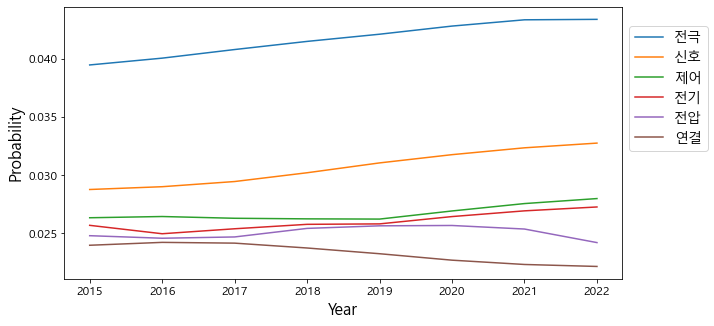

In [38]:
keywords_graph(df_5,words_5)

## Topic 6

In [39]:
keywords_6=model.print_topic_times(6,10)
keywords_6

[[('정보', 0.04502206048841294),
  ('데이터', 0.02506669791181032),
  ('사용자', 0.024381315904707906),
  ('시스템', 0.021955610289566607),
  ('수신', 0.020222025757597212),
  ('장치', 0.020133113318330984),
  ('전송', 0.019124284928088205),
  ('통신', 0.01601148928462585),
  ('단말', 0.015051766658442836),
  ('제어', 0.01367745105153321)],
 [('정보', 0.04639412055943993),
  ('사용자', 0.025703597526680437),
  ('데이터', 0.025176221891865403),
  ('시스템', 0.021893955763230177),
  ('수신', 0.020408403421397752),
  ('장치', 0.020365049706612102),
  ('전송', 0.018987812216918493),
  ('통신', 0.01549957398548651),
  ('단말', 0.014671345681042123),
  ('제어', 0.01371300728637101)],
 [('정보', 0.04783561834484639),
  ('사용자', 0.02758737213384418),
  ('데이터', 0.02534723543943577),
  ('시스템', 0.021802819911160332),
  ('장치', 0.020761574914947935),
  ('수신', 0.020725569478311175),
  ('전송', 0.018664847406669398),
  ('통신', 0.014945882822075299),
  ('단말', 0.014277172112119246),
  ('제어', 0.013794098454899777)],
 [('정보', 0.04889251379796101),
  ('사용자

In [40]:
#상위 6개 키워드 설정
words_6=['정보','데이터','사용자','시스템','수신','장치']

In [41]:
df_6 = get_keyword(keywords_6,words_6)
df_6

,year,정보,데이터,사용자,시스템,수신,장치
0,2015,0.045022,0.025067,0.024381,0.021956,0.020222,0.020133
1,2016,0.046394,0.025704,0.025176,0.021894,0.020408,0.020365
2,2017,0.047836,0.027587,0.025347,0.021803,0.020762,0.020726
3,2018,0.048893,0.028982,0.025599,0.021562,0.021289,0.020965
4,2019,0.049602,0.029485,0.025902,0.021874,0.021350,0.021234
5,2020,0.050477,0.029569,0.026199,0.022421,0.021719,0.021415
6,2021,0.051285,0.030715,0.026422,0.022813,0.022651,0.021418
7,2022,0.051724,0.031837,0.026499,0.023261,0.022966,0.021267


In [43]:
#파일 저장
df_6.to_excel('Topic6.xlsx')

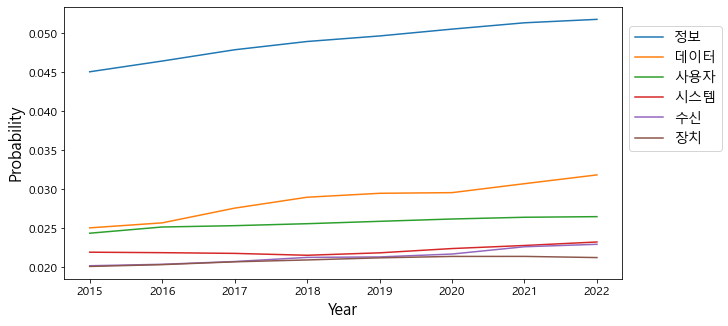

In [42]:
keywords_graph(df_6,words_6)

## Topic 7

In [44]:
keywords_7=model.print_topic_times(7,10)
keywords_7

[[('공급', 0.036443333962947716),
  ('장치', 0.027262652379650004),
  ('내부', 0.024118793995244962),
  ('가스', 0.023533122610964716),
  ('배출', 0.02063368756855648),
  ('공기', 0.019947685806494954),
  ('밸브', 0.015444082550121342),
  ('유입', 0.01406220828221427),
  ('용기', 0.012283761143534489),
  ('연결', 0.011491102916486447)],
 [('공급', 0.03643489206810968),
  ('장치', 0.027241858825265336),
  ('내부', 0.02423541555802795),
  ('가스', 0.023157471466232447),
  ('배출', 0.021011257748923727),
  ('공기', 0.019634828456956556),
  ('밸브', 0.015470679064668017),
  ('유입', 0.0139793080201762),
  ('용기', 0.012622830618686357),
  ('냉각', 0.01158780148835679)],
 [('공급', 0.037590496105606296),
  ('장치', 0.02719304861413618),
  ('내부', 0.02436064313898259),
  ('가스', 0.022678407402319356),
  ('배출', 0.02132690249028678),
  ('공기', 0.019681652300745738),
  ('밸브', 0.01530235757945814),
  ('유입', 0.013797652487608916),
  ('용기', 0.013124623088176161),
  ('공간', 0.011808095847858)],
 [('공급', 0.037354983953171494),
  ('장치', 0.02720348

In [45]:
#상위 6개 키워드 설정
words_7=['공급','장치','내부','가스','배출','공기']

In [46]:
df_7 = get_keyword(keywords_7,words_7)
df_7

,year,공급,장치,내부,가스,배출,공기
0,2015,0.036443,0.027263,0.024119,0.023533,0.020634,0.019948
1,2016,0.036435,0.027242,0.024235,0.023157,0.021011,0.019635
2,2017,0.037590,0.027193,0.024361,0.022678,0.021327,0.019682
3,2018,0.037355,0.027203,0.024572,0.022113,0.021331,0.020432
4,2019,0.035686,0.027274,0.024656,0.021845,0.021768,0.021007
5,2020,0.036323,0.027250,0.024802,0.023143,0.021911,0.020391
6,2021,0.036836,0.027163,0.024978,0.023480,0.022302,0.019958
7,2022,0.036081,0.027066,0.025321,0.023235,0.022471,0.019726


In [48]:
#파일 저장
df_7.to_excel('Topic7.xlsx')

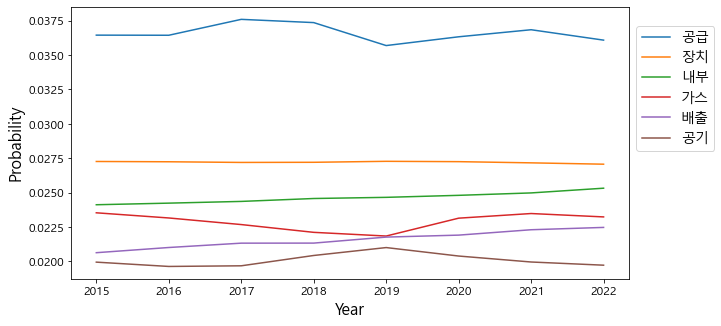

In [47]:
keywords_graph(df_7,words_7)